In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

Index(['Unnamed: 0', 'TxnTime', 'Consumption'], dtype='object')


<ipython-input-15-5102935f7809>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.timestamp=pd.to_datetime(train.TxnDate,format='%d %b %Y')


<Axes: xlabel='TxnDate'>

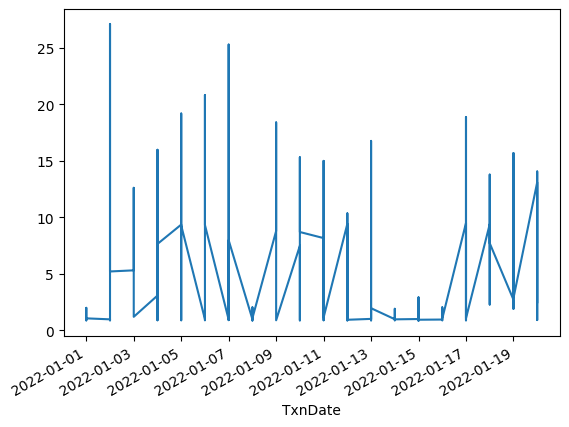

In [ ]:
train=pd.read_csv('/content/KwhConsumptionBlower78_1.csv')
train.timestamp=pd.to_datetime(train.TxnDate,format='%d %b %Y')
train.index=train.timestamp
train.drop("TxnDate",axis=1,inplace=True)
train.head()
print(train.columns)
train.columns = train.columns.str.strip()
train['Consumption'].plot()


ADF Statistic: -3.8474891226902597
p-value: 0.0024571468528052135
ADF Statistic: -12.09605430891691
p-value: 2.0694009860473797e-22


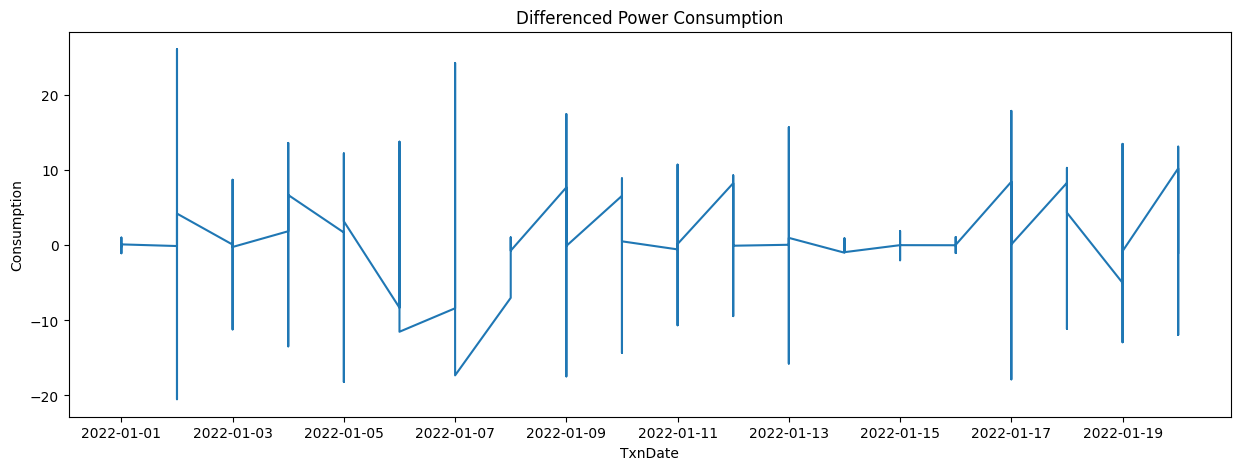

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
result = adfuller(train['Consumption'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Since the p-value is > 0.05, the data is not stationary. We need to difference it.
train_diff = train['Consumption'].diff().dropna()

# Check for stationarity again
result = adfuller(train_diff)

print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Plot the differenced data
plt.figure(figsize=(15, 5))
plt.plot(train_diff)
plt.title('Differenced Power Consumption')
plt.xlabel('TxnDate')
plt.ylabel('Consumption')
plt.show()

In [ ]:
# Fit the ARMA(1, 1) model
model = ARIMA(train_diff, order=(1, 0, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                 1227
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3151.513
Date:                Wed, 04 Sep 2024   AIC                           6311.026
Time:                        04:41:59   BIC                           6331.476
Sample:                             0   HQIC                          6318.721
                               - 1227                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.009      0.308      0.758      -0.015       0.020
ar.L1         -0.0016      0.027     -0.060      0.952      -0.054       0.051
ma.L1         -0.9215      0.010    -96.716      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


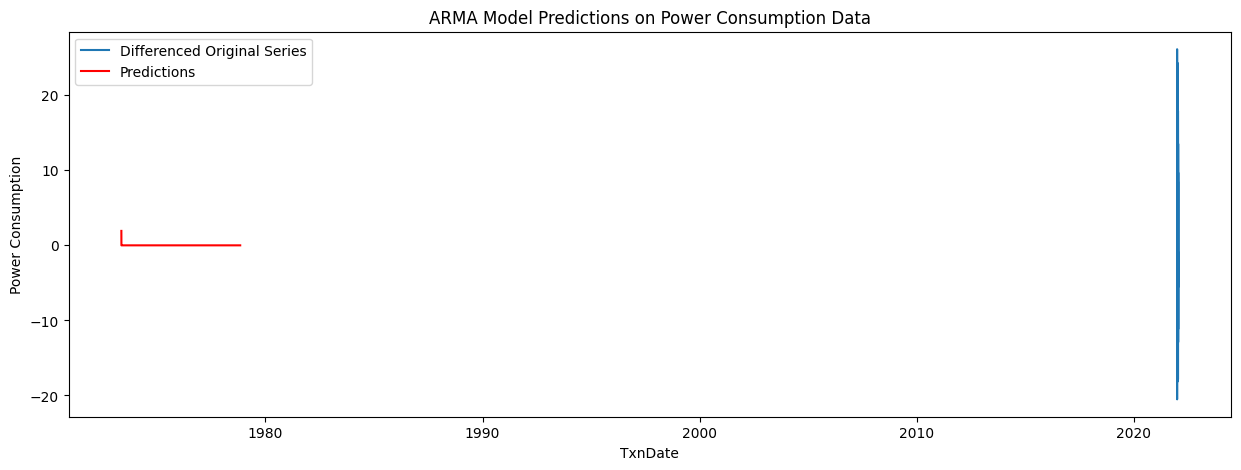

In [ ]:
start = len(train_diff)
end = start + 2000
predictions = model_fit.predict(start=start, end=end)

# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(train_diff, label='Differenced Original Series')
plt.plot(predictions, label='Predictions', color='red')
plt.legend()
plt.title('ARMA Model Predictions on Power Consumption Data')
plt.xlabel('TxnDate')
plt.ylabel('Power Consumption')
plt.show()